In [64]:
#Imbalanced Classification Problem
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from decimal import *
getcontext().prec = 17

### TOOLS

In [65]:
def compute_metrics(actual, predictions, predictions_scores):
    cm1 = confusion_matrix(y_true=actual, y_pred=predictions)
    print("CONFUSION MATRIX")
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            ax.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    # plt.savefig('./figures/confusion_matrix.png', dpi=300)
    plt.show()

    print('SPECIFICITY: ', Decimal(cm1[1,1].item()) / (Decimal(cm1[1,0].item()) + Decimal(cm1[1,1].item())) )
    print('SENSITIVITY: ', Decimal(cm1[0,0].item()) / (Decimal(cm1[0,0].item()) + Decimal(cm1[0,1].item())) )
    print('PRECISION: ', precision_score(actual, predictions))
    print('ACCURACY: ', accuracy_score(actual, predictions))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions_scores)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [66]:
def compute_prediction_classes_count(predictions):
    x = np.bincount(predictions)
    ii = np.nonzero(x)[0]
    print("\nPrediction for every class:")
    print(np.vstack((ii,x[ii])).T)

### Lettura dataset

In [67]:
dataset1 = pd.read_excel("/Users/antonio/GitHub/ia/data.xlsx")
dataset1.head()

ID_studente  Genere  Diploma_scuola_sup  AreaGeografica_scuola_sup  \
0            1       1                   1                          3   
1            2       1                   1                          4   
2            3       1                   1                          4   
3            4       1                   1                          4   
4            5       1                   1                          3   

   Voto_scuola_sup  Voto_scuola_sup_classi  Età_immatricolazione  \
0            100.0                       1                     1   
1            100.0                       1                     1   
2            100.0                       1                     1   
3            100.0                       1                     1   
4            100.0                       1                     1   

   Situazione_OFA  Corso_di_studio_IDAggr  Scuola  Ciclo  Abbandoni  
0               1                     446       4      2          0  
1               1                     446       4      2          0  
2               2                     446       4      2          0  
3               1                     446       4      2          0  
4               2                     446       4      2          0

### Preprocessing dati

In [68]:
#Clean dataset
dataset = dataset1.drop(columns = ["ID_studente", "Voto_scuola_sup", "Situazione_OFA"] )
dataset.head()

Genere  Diploma_scuola_sup  AreaGeografica_scuola_sup  \
0       1                   1                          3   
1       1                   1                          4   
2       1                   1                          4   
3       1                   1                          4   
4       1                   1                          3   

   Voto_scuola_sup_classi  Età_immatricolazione  Corso_di_studio_IDAggr  \
0                       1                     1                     446   
1                       1                     1                     446   
2                       1                     1                     446   
3                       1                     1                     446   
4                       1                     1                     446   

   Scuola  Ciclo  Abbandoni  
0       4      2          0  
1       4      2          0  
2       4      2          0  
3       4      2          0  
4       4      2          0

In [69]:
#Find out number of values in each class. 
dataset['Abbandoni'].value_counts()

0    12874
1     1734
Name: Abbandoni, dtype: int64

## Split test-training set

In [70]:
#The ratio of 0s to 1s is 1:7. This is a clear case of Imbalances class classification
X = dataset.drop('Abbandoni', axis=1)
y = dataset['Abbandoni']

In [71]:
#Being imbalanced classification, we cannot ensure the predictions will be correct for the minority class
#So we will perform a SMOTE to balance out the two classes. Lets split the dataset into train and test before that
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
y_test.value_counts()

0    3860
1     523
Name: Abbandoni, dtype: int64

# TESTS

### Regressione logistica with K-fold cross validation

In [73]:
#Perform a Kfold cross validation and train/test the folds using LogisticRegression algorithm
parameters = {'C':(0.01, 0.1, 2, 10, 50)}
lr = LogisticRegression(solver="liblinear")
clf = GridSearchCV(lr, parameters, cv=10)
clf.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': (0.01, 0.1, 2, 10, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [74]:
clf.best_params_

{'C': 0.01}

CONFUSION MATRIX


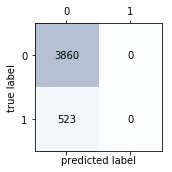

SPECIFICITY:  0
SENSITIVITY:  1
PRECISION:  0.0
ACCURACY:  0.8806753365274926


/Users/antonio/anaconda2/envs/dropout/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


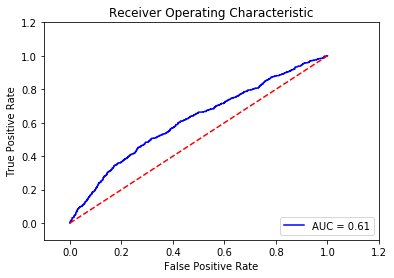


Prediction for every class:
[[   0 4383]]


In [75]:
lr1 = LogisticRegression(C=0.01, penalty='l2', verbose=0, solver="liblinear")
lr1.fit(X_train, y_train)

actual = y_test
predictions = lr1.predict(X_test)
predictions_scores = lr1.predict_proba(X_test)[:,1] # needed for roc calc

compute_metrics(actual=actual, predictions=predictions, predictions_scores=predictions_scores)
compute_prediction_classes_count(predictions=predictions)

### Random forest

CONFUSION MATRIX


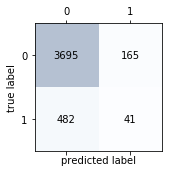

SPECIFICITY:  0.078393881453154876
SENSITIVITY:  0.95725388601036269
PRECISION:  0.19902912621359223
ACCURACY:  0.8523842117271275


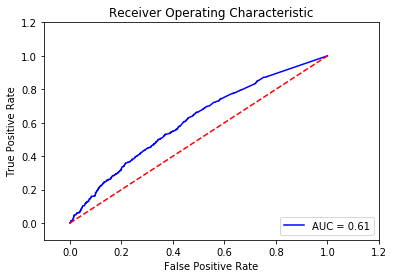


Prediction for every class:
[[   0 4177]
 [   1  206]]


In [76]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# predizione sul test set
actual = y_test
predictions = clf.predict(X_test)
predictions_scores = clf.predict_proba(X_test)[:,1] # needed for roc calc

compute_metrics(actual=actual, predictions=predictions, predictions_scores=predictions_scores)
compute_prediction_classes_count(predictions=predictions)